## Week 3 Lab

***

## Project Description

In 2004, the state of North Carolina released a large data set containing information on births recorded in this state. This data set is useful to researchers studying the relation between habits and practices of expectant mothers and the birth of their children. We will work with a random sample of observations from this data set.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import datetime
import random
from datetime import datetime, timedelta
import scipy.stats
import pandas_profiling
from pandas_profiling import ProfileReport
import math


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Folium library to plot values on a map.
#import folium

# Use Feature-Engine library
#import feature_engine
#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.option_context('float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


In [2]:
df = pd.read_csv("nc.csv")

In [3]:
df

,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
0,NaN,13,younger mom,39.0,full term,10.0,married,38.0,7.63,not low,male,nonsmoker,not white
1,NaN,14,younger mom,42.0,full term,15.0,married,20.0,7.88,not low,male,nonsmoker,not white
2,19.0,15,younger mom,37.0,full term,11.0,married,38.0,6.63,not low,female,nonsmoker,white
3,21.0,15,younger mom,41.0,full term,6.0,married,34.0,8.00,not low,male,nonsmoker,white
4,NaN,15,younger mom,39.0,full term,9.0,married,27.0,6.38,not low,female,nonsmoker,not white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,47.0,42,mature mom,40.0,full term,10.0,not married,26.0,8.44,not low,male,nonsmoker,not white
996,34.0,42,mature mom,38.0,full term,18.0,not married,20.0,6.19,not low,female,nonsmoker,white
997,39.0,45,mature mom,40.0,full term,15.0,not married,32.0,6.94,not low,female,nonsmoker,white
998,55.0,46,mature mom,31.0,premie,8.0,not married,25.0,4.56,low,female,nonsmoker,not white


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fage            829 non-null    float64
 1   mage            1000 non-null   int64  
 2   mature          1000 non-null   object 
 3   weeks           998 non-null    float64
 4   premie          998 non-null    object 
 5   visits          991 non-null    float64
 6   marital         999 non-null    object 
 7   gained          973 non-null    float64
 8   weight          1000 non-null   float64
 9   lowbirthweight  1000 non-null   object 
 10  gender          1000 non-null   object 
 11  habit           999 non-null    object 
 12  whitemom        998 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 101.7+ KB


In [5]:
df.describe()

,fage,mage,weeks,visits,gained,weight
count,829.000000,1000.000000,998.000000,991.000000,973.000000,1000.00000
mean,30.255730,27.000000,38.334669,12.104945,30.325797,7.10100
std,6.763766,6.213583,2.931553,3.954934,14.241297,1.50886
min,14.000000,13.000000,20.000000,0.000000,0.000000,1.00000
25%,25.000000,22.000000,37.000000,10.000000,20.000000,6.38000
50%,30.000000,27.000000,39.000000,12.000000,30.000000,7.31000
75%,35.000000,32.000000,40.000000,15.000000,38.000000,8.06000
max,55.000000,50.000000,45.000000,30.000000,85.000000,11.75000


In [6]:
df.columns

Index(['fage', 'mage', 'mature', 'weeks', 'premie', 'visits', 'marital', 'gained', 'weight', 'lowbirthweight', 'gender', 'habit', 'whitemom'], dtype='object')

There are 1,000 cases in this data set, what do the cases represent? 

The births

How many mothers are we missing weight gain data from?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fage            829 non-null    float64
 1   mage            1000 non-null   int64  
 2   mature          1000 non-null   object 
 3   weeks           998 non-null    float64
 4   premie          998 non-null    object 
 5   visits          991 non-null    float64
 6   marital         999 non-null    object 
 7   gained          973 non-null    float64
 8   weight          1000 non-null   float64
 9   lowbirthweight  1000 non-null   object 
 10  gender          1000 non-null   object 
 11  habit           999 non-null    object 
 12  whitemom        998 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 101.7+ KB


In [8]:
df["gained"].isna().sum()

27

Make side-by-side boxplots of habit and weight. Which of the following is false about the relationship between habit and weight?

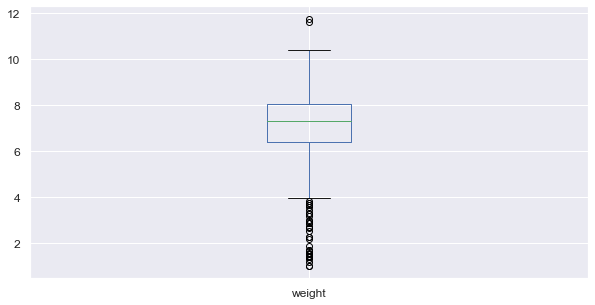

In [9]:
df["weight"].plot(kind="box", figsize=(10,5))
plt.show()

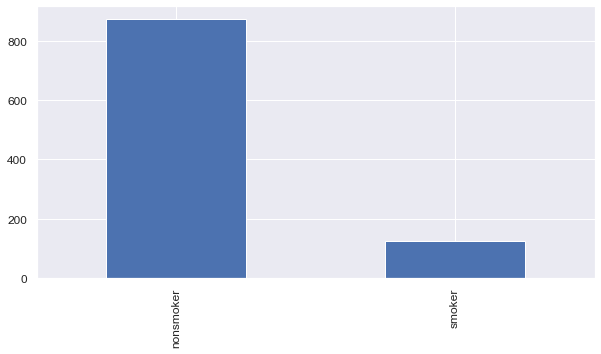

In [10]:
df["habit"].value_counts().plot(kind="bar", figsize=(10,5))
plt.show()

In [11]:
df.groupby("habit").median()

,fage,mage,weeks,visits,gained,weight
habit,,,,,,
nonsmoker,31.0,27.0,39.0,12.0,30.0,7.31
smoker,27.0,24.5,39.0,12.0,30.0,7.06


The IQRs of the distributions are roughly equal.

What are the hypotheses for testing if the average weights of babies born to smoking and non-smoking mothers are different

H0:μ smoking =μ non−smoking; HA:μ smoking ≠ μ non−smoking

Change the type argument to "ci" to construct and record a confidence interval for the difference between the weights of babies born to nonsmoking and smoking mothers, and interpret this interval in context of the data. Note that by default you’ll get a 95% confidence interval. 

In [12]:
stats = df.groupby(['habit'])['weight'].agg(['mean', 'count', 'std'])

In [13]:
stats

,mean,count,std
habit,,,
nonsmoker,7.144273,873,1.518681
smoker,6.828730,126,1.386180


In [14]:
ci95_hi = []
ci95_lo = []

for i in stats.index:
    m, c, s = stats.loc[i]
    ci95_hi.append(m + 1.95*s/math.sqrt(c))
    ci95_lo.append(m - 1.95*s/math.sqrt(c))


In [15]:
ci95_hi, ci95_lo

([7.244501747554934, 7.069537042422382],
 [7.044043498722329, 6.587923275037935])

We are 95% confident that the difference in average weights of babies whose moms are smokers and nonsmokers is between 0.05 to 0.58 pounds. 

Calculate a 99% confidence interval for the average length of pregnancies (weeks). Note that since you’re doing inference on a single population parameter, there is no explanatory variable, so you can omit the x variable from the function.

In [16]:
stats2 = df.groupby(['habit'])['weeks'].agg(['mean', 'count', 'std'])

In [17]:
stats2

,mean,count,std
habit,,,
nonsmoker,38.318807,872,2.993558
smoker,38.444444,126,2.467567


In [18]:
ci99_hi = []
ci99_lo = []

for i in stats2.index:
    m, c, s = stats2.loc[i]
    ci99_hi.append(m + 2.58*s/math.sqrt(c))
    ci99_lo.append(m - 2.58*s/math.sqrt(c))


In [19]:
ci99_hi, ci99_lo

([38.58035399850797, 39.01160165509005],
 [38.05726068039112, 37.87728723379884])

(38.0952 , 38.5742) 

Now, a non-inference task: Determine the age cutoff for younger and mature mothers. Use a method of your choice, and explain how your method works.

In [25]:
stats3 = df.groupby(by="mature")['mage'].agg(['mean','std','count'])

In [26]:
ci95_hi = []
ci95_lo = []

for i in stats3.index:
    m, c, s = stats3.loc[i]
    ci95_hi.append(m + 1.95*s/math.sqrt(c))
    ci95_lo.append(m - 1.95*s/math.sqrt(c))


In [27]:
ci95_hi, ci95_lo

([203.54168942607703, 779.4265053842599],
 [-129.18078717043795, -728.5499194557709])

#### Python code done by Dennis Lam